# Covid-19 Spanish Plots

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.max_open_warning'] = 0
date_format_ingest_std = '%Y-%m-%d'

## Analysis Description

Gráficas de las variables acumuladas e incrementales por región (provincia) y total.

In [2]:
# Reading aggregated dataset
df_covid19_agg = pd.read_csv('../../data/standard/Covid19AggSP.csv', parse_dates = ['date'])

In [3]:
# Removing column regarding quick tests
df_covid19_agg.drop(['num_cases_qtest'], axis = 1, inplace = True)

In [4]:
df_covid19_agg

,region,date,num_cases,num_cases_pcr,num_hosp,num_icu,num_deaths,num_recov
0,AN,2020-02-20,0,0,0,0,0,0
1,AN,2020-02-21,0,0,0,0,0,0
2,AN,2020-02-22,0,0,0,0,0,0
3,AN,2020-02-23,0,0,0,0,0,0
4,AN,2020-02-24,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1268,VC,2020-04-22,10735,9869,4917,650,1124,5388
1269,VC,2020-04-23,10906,9939,4945,651,1147,5809
1270,VC,2020-04-24,11123,10066,4978,653,1172,6033
1271,VC,2020-04-25,11372,10160,5013,654,1186,6243


In [5]:
# Reading incremental dataset
df_covid19_inc = pd.read_csv('../../data/standard/Covid19IncSP.csv', parse_dates = ['date'])

In [6]:
# Removing column regarding quick tests 
df_covid19_inc.drop(['num_cases_qtest'], axis = 1, inplace = True)

In [7]:
df_covid19_inc

,region,date,num_cases,num_cases_pcr,num_hosp,num_icu,num_deaths,num_recov
0,AN,2020-02-21,0,0,0,0,0,0
1,AN,2020-02-22,0,0,0,0,0,0
2,AN,2020-02-23,0,0,0,0,0,0
3,AN,2020-02-24,0,0,0,0,0,0
4,AN,2020-02-25,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1249,VC,2020-04-22,164,44,21,1,18,377
1250,VC,2020-04-23,171,70,28,1,23,421
1251,VC,2020-04-24,217,127,33,2,25,224
1252,VC,2020-04-25,249,94,35,1,14,210


In [8]:
# Get list of regions
list_regions = sorted(list(df_covid19_agg['region'].unique()))

# Define color palette
pal = dict(num_cases = 'navy', num_cases_pcr = 'blue', num_recov = 'green', num_hosp = 'orange', num_icu= 'red', num_deaths = 'black')

## Plotting Aggregated Values

### Global Graph

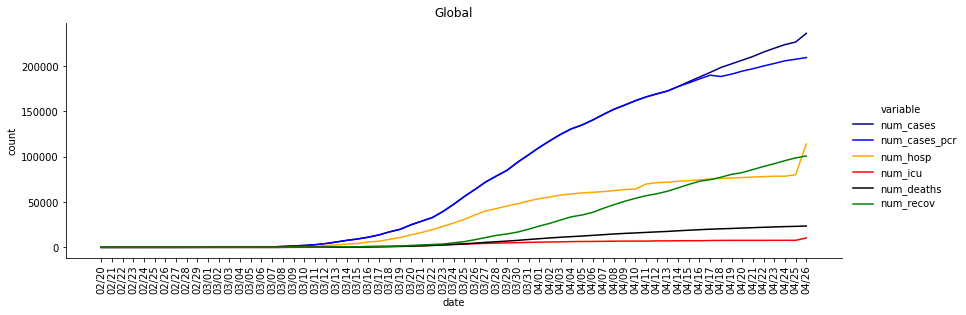

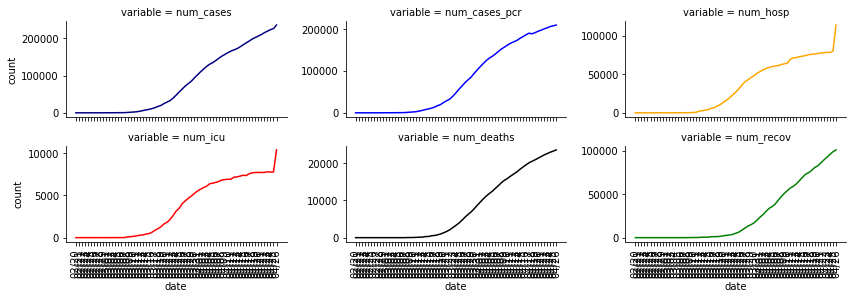

In [9]:
df_covid19_agg_total = df_covid19_agg.groupby(['date'], as_index = False).sum()
df_covid19_agg_total['date'] = df_covid19_agg_total['date'].apply(lambda x: x.strftime('%m/%d'))
df = df_covid19_agg_total.melt('date', var_name='variable', value_name='count')

g = sns.relplot(x = 'date', y = 'count', hue= 'variable',
                height= 4, aspect= 6 / 2,
                facet_kws = dict(sharex = False), palette = pal,
                kind = 'line', legend= 'full', data = df)
plt.title("Global")
g.set_xticklabels(rotation = 90) 

g = sns.FacetGrid(df, col = 'variable', hue = 'variable',
                  height= 2, aspect= 4 / 2, col_wrap = 3, 
                  sharey = False, palette = pal)
g.map(plt.plot, 'date', 'count')
g.set_xticklabels(rotation = 90) 

### Region Graphs

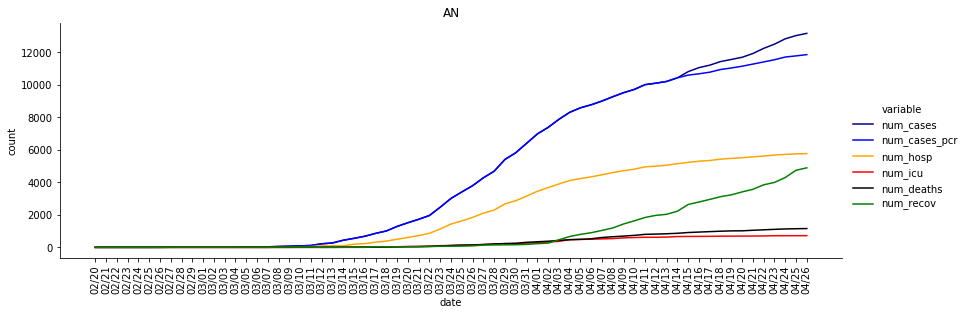

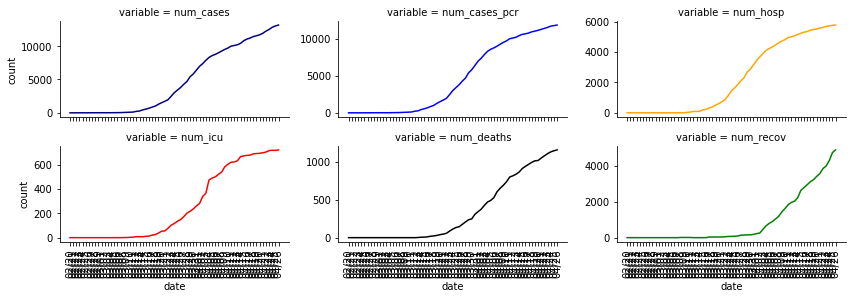

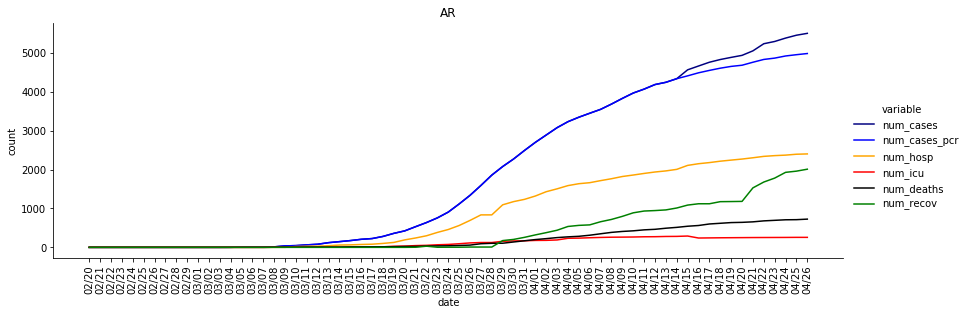

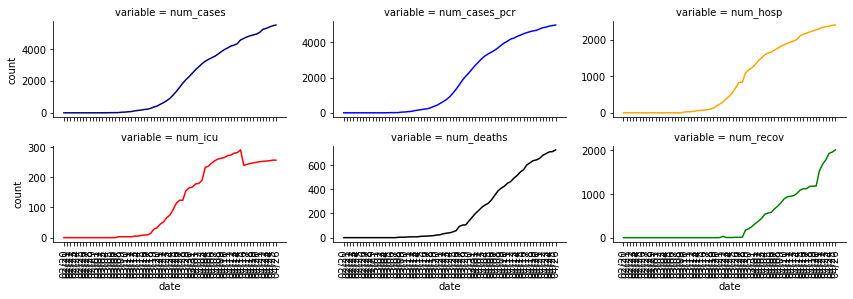

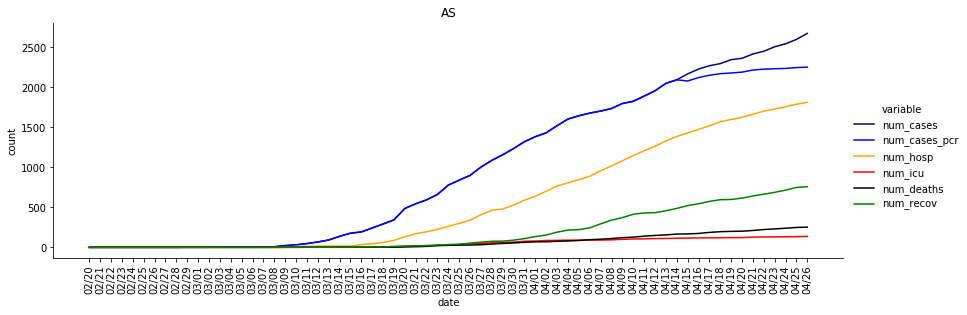

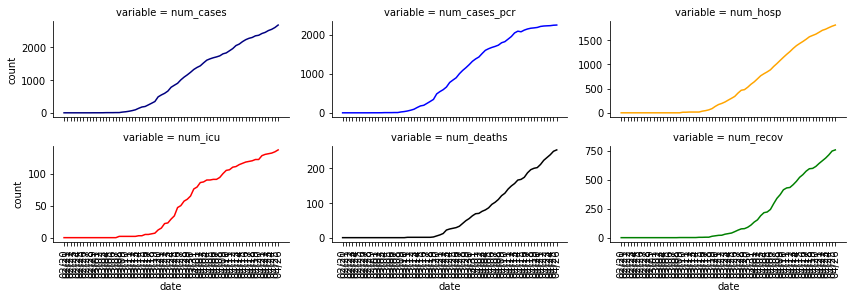

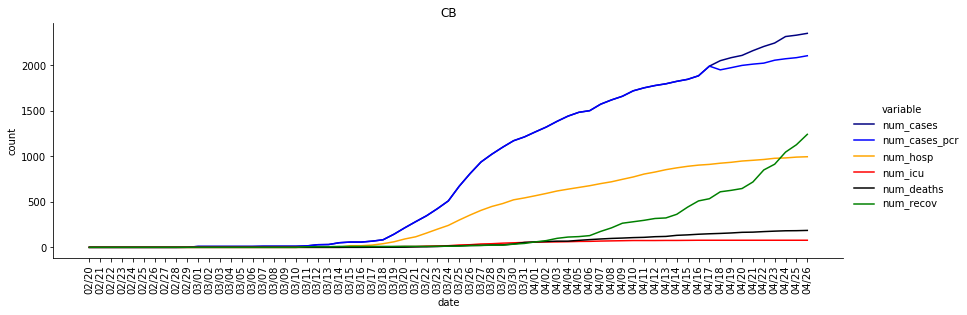

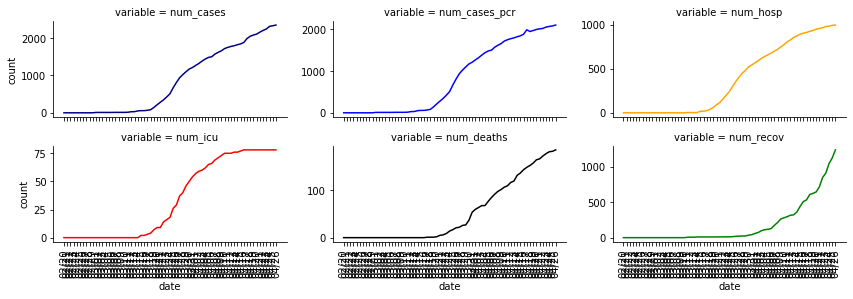

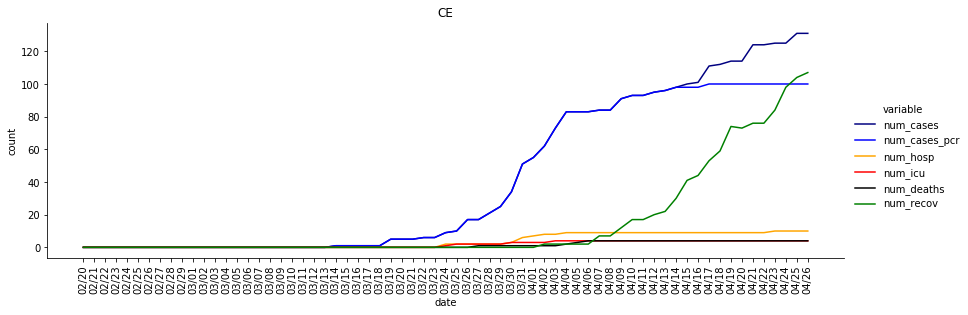

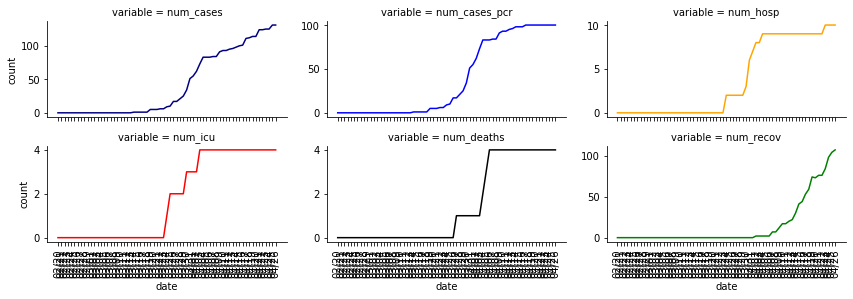

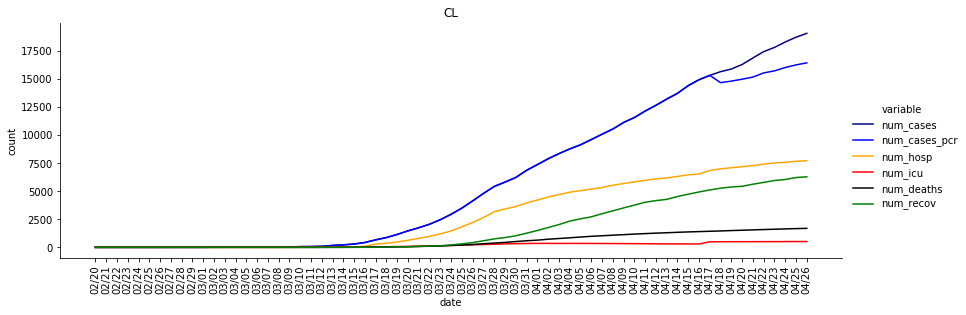

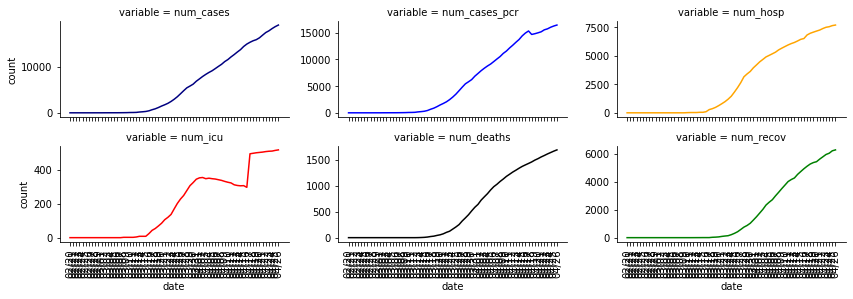

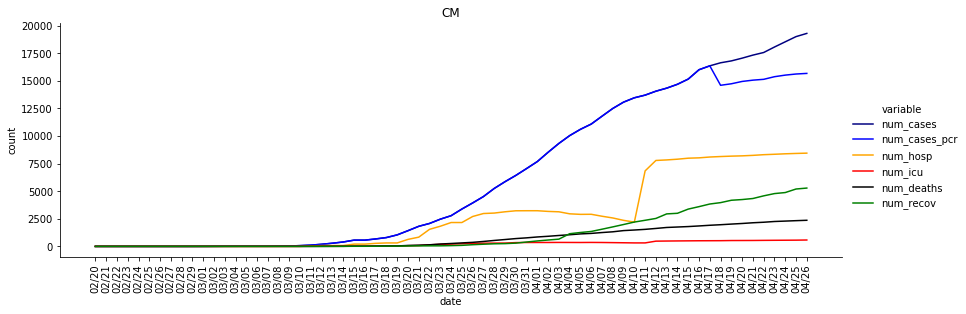

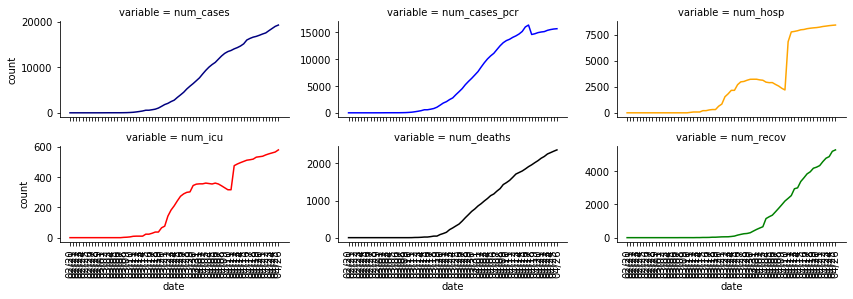

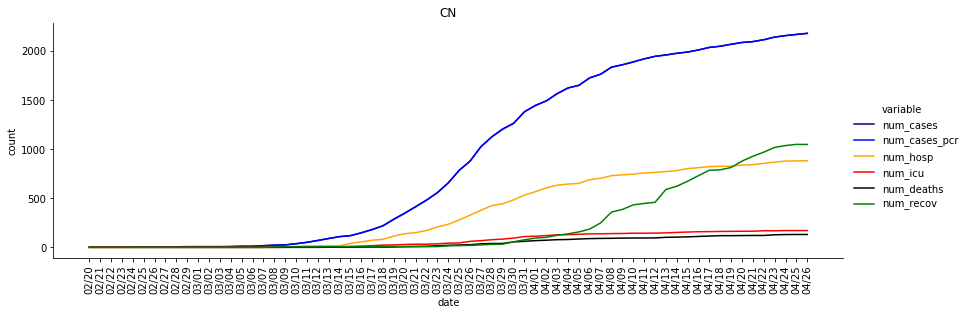

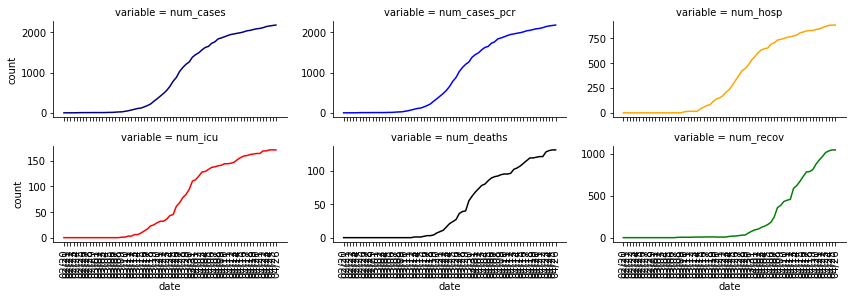

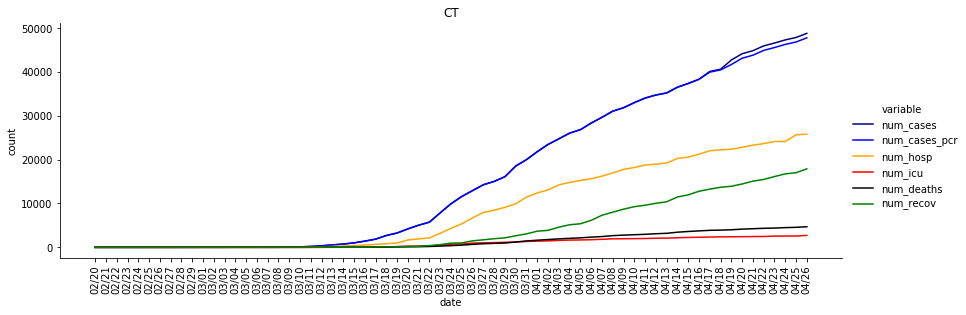

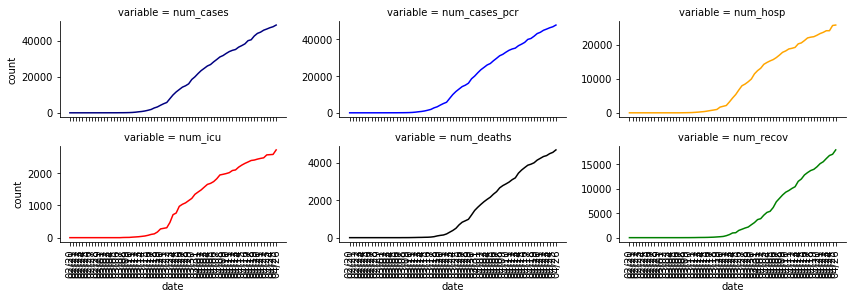

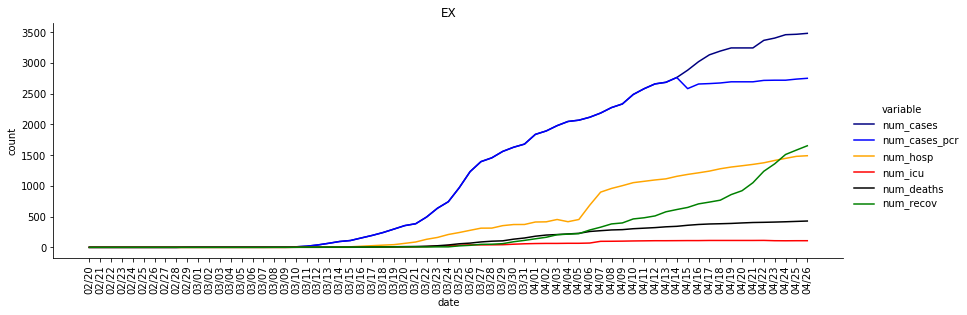

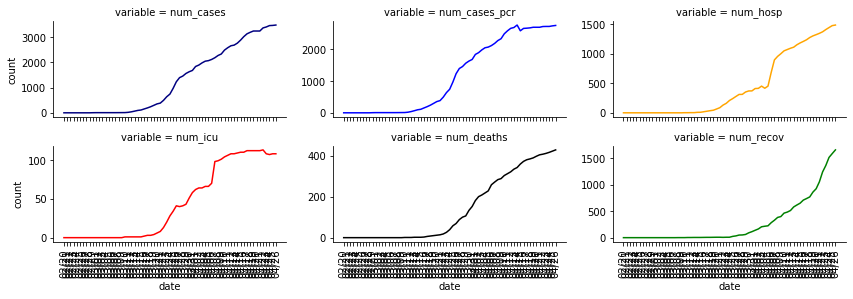

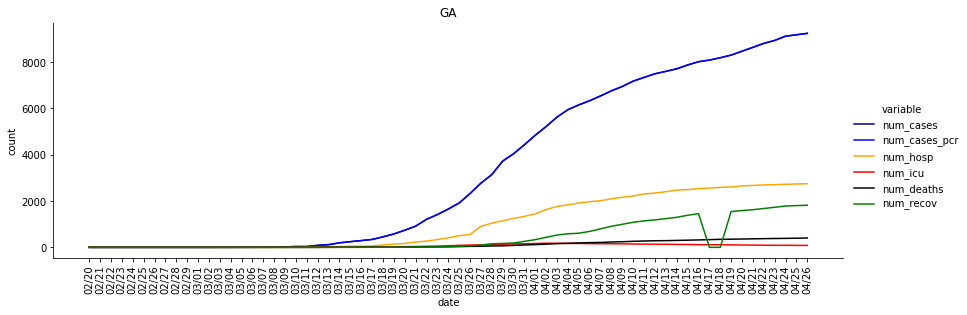

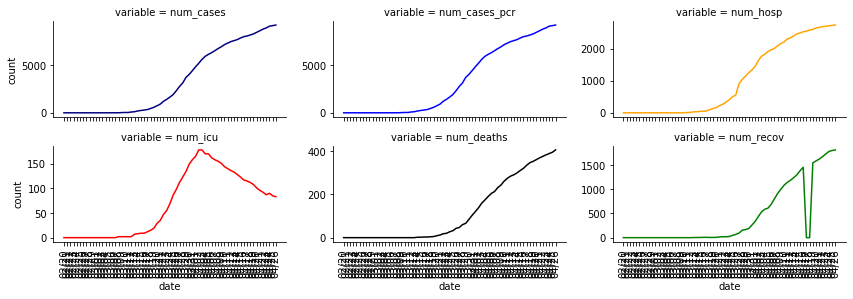

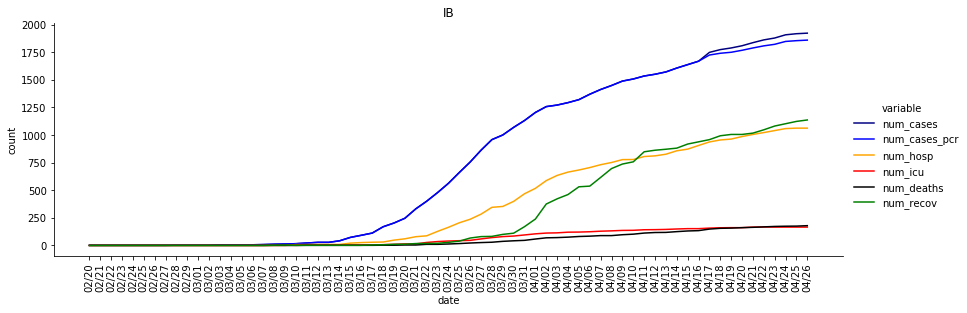

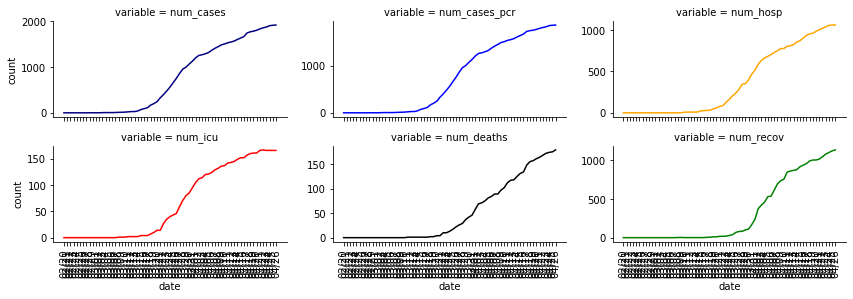

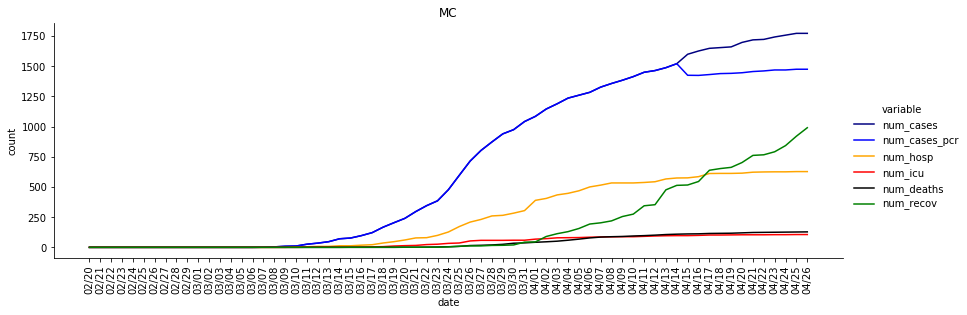

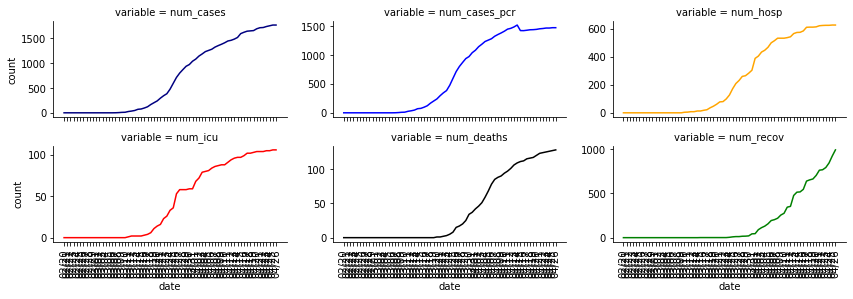

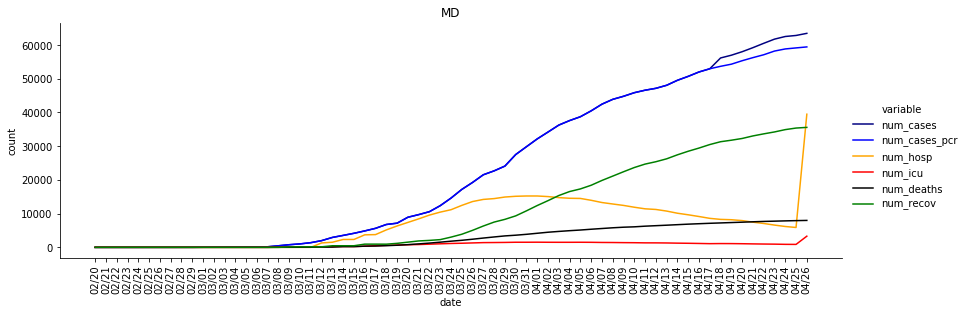

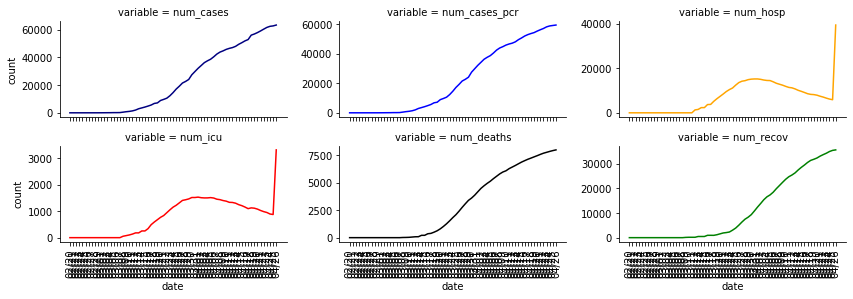

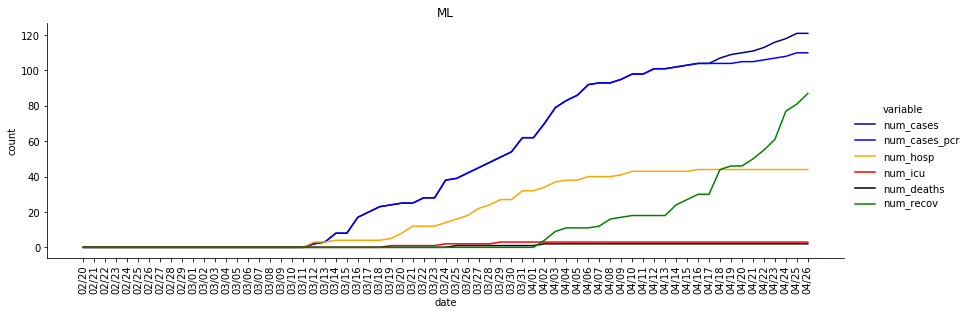

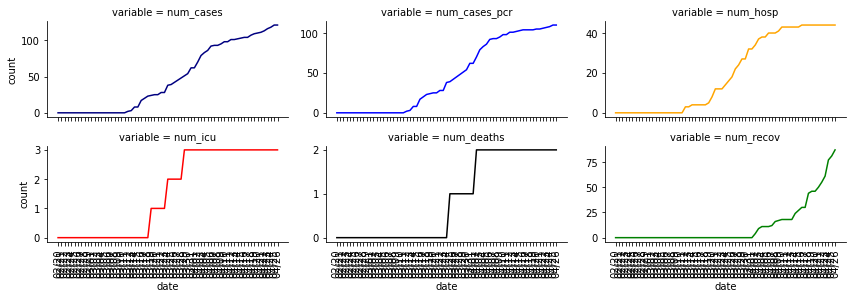

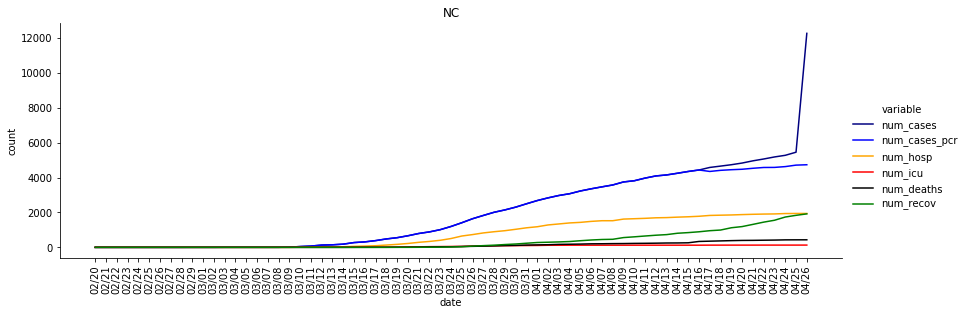

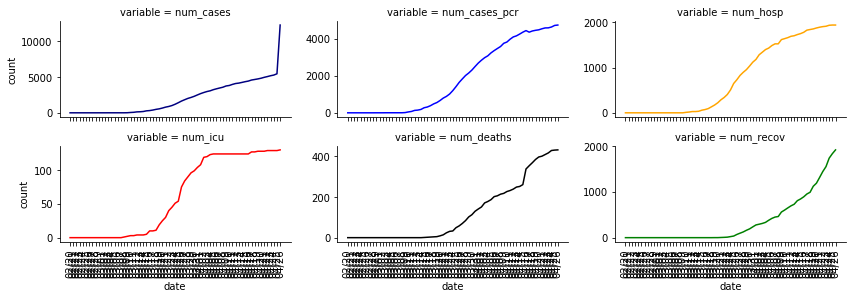

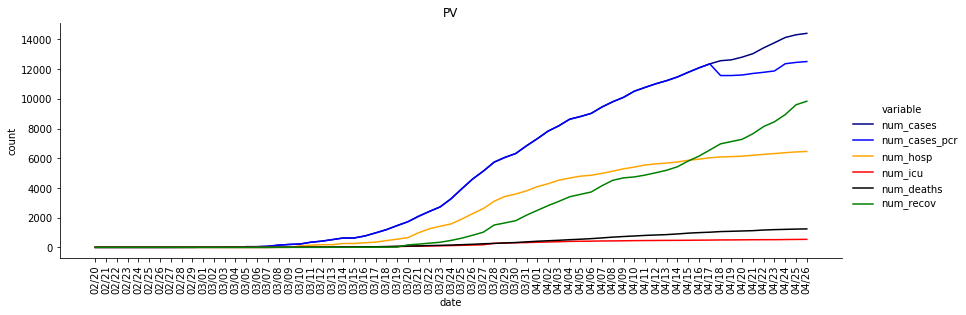

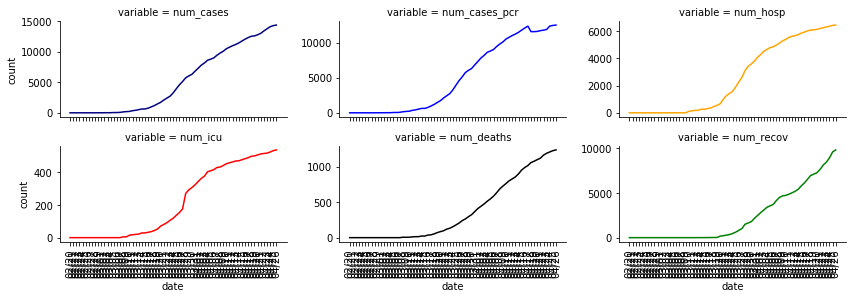

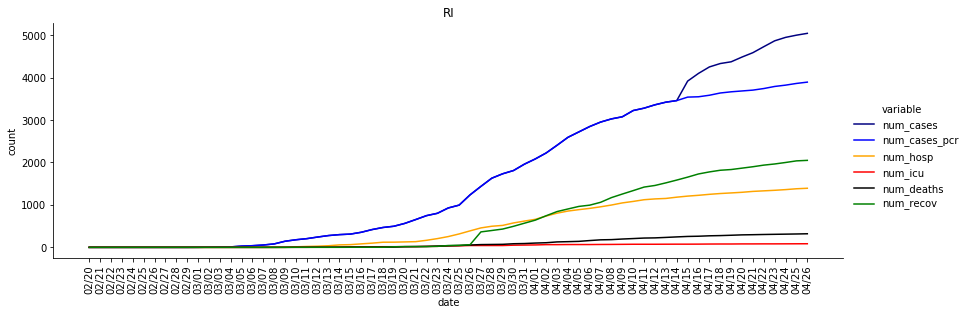

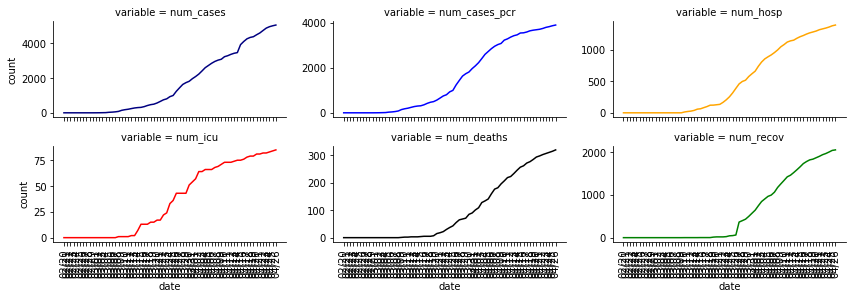

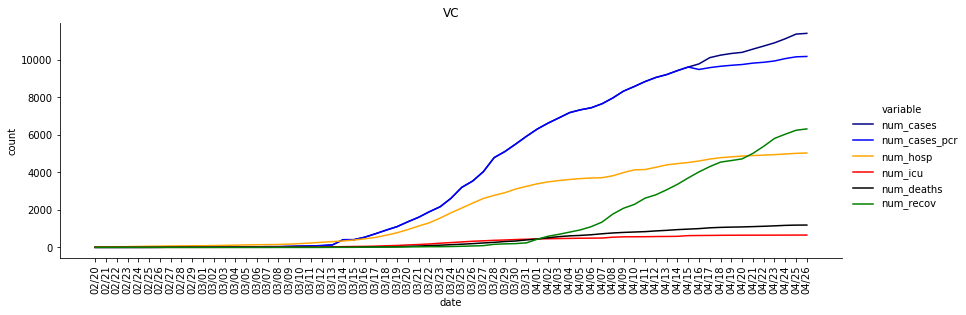

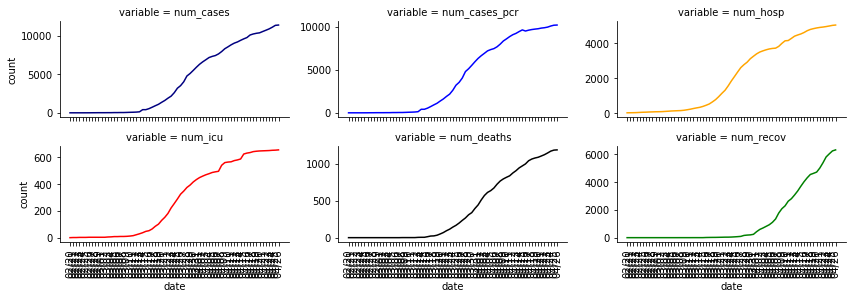

In [10]:
for region in list_regions:
    df_covid19_agg_region = df_covid19_agg[df_covid19_agg['region'] == region].drop('region', axis = 1)
    df_covid19_agg_region['date'] = df_covid19_agg_region['date'].apply(lambda x: x.strftime('%m/%d'))
    df = df_covid19_agg_region.melt('date', var_name='variable', value_name='count')
    g = sns.relplot(x = 'date', y = 'count', hue= 'variable',
                    height= 4, aspect= 6 / 2,
                    facet_kws = dict(sharex = False), palette = pal,
                    kind = 'line', legend= 'full', data = df)
    plt.title(region)
    g.set_xticklabels(rotation = 90)
    
    g = sns.FacetGrid(df, col = 'variable', hue = 'variable', 
                      height= 2, aspect= 4 / 2, col_wrap = 3, 
                      sharey = False, palette = pal)
    g.map(plt.plot, 'date', 'count')
    g.set_xticklabels(rotation = 90) 

## Plotting Incremental Values

### Global Graph

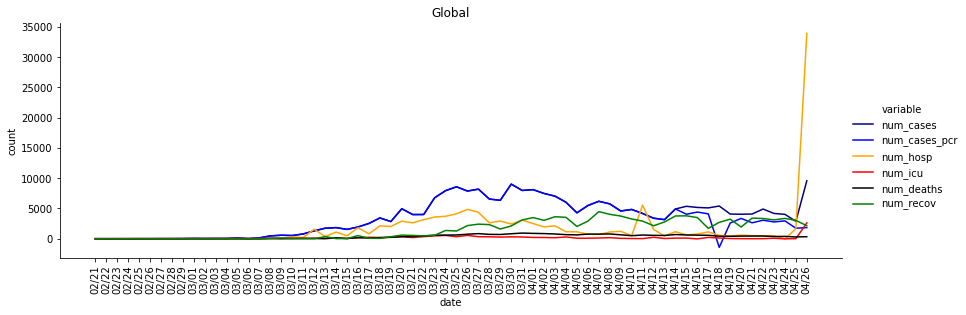

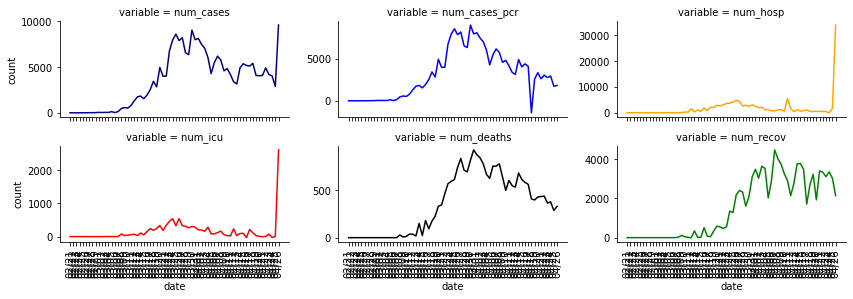

In [11]:
df_covid19_inc_total = df_covid19_inc.groupby(['date'], as_index = False).sum()
df_covid19_inc_total['date'] = df_covid19_inc_total['date'].apply(lambda x: x.strftime('%m/%d'))
df = df_covid19_inc_total.melt('date', var_name='variable', value_name='count')

g = sns.relplot(x = 'date', y = 'count', hue = 'variable',
                height= 4, aspect= 6 / 2,
                facet_kws = dict(sharex = False), palette = pal,
                kind = 'line', legend= 'full', data = df)
plt.title("Global")
g.set_xticklabels(rotation = 90) 

g = sns.FacetGrid(df, col = 'variable', hue = 'variable', 
                  height= 2, aspect= 4 / 2, col_wrap = 3, 
                  sharey = False, palette = pal)
g.map(plt.plot, 'date', 'count')
g.set_xticklabels(rotation = 90) 

### Region Graphs

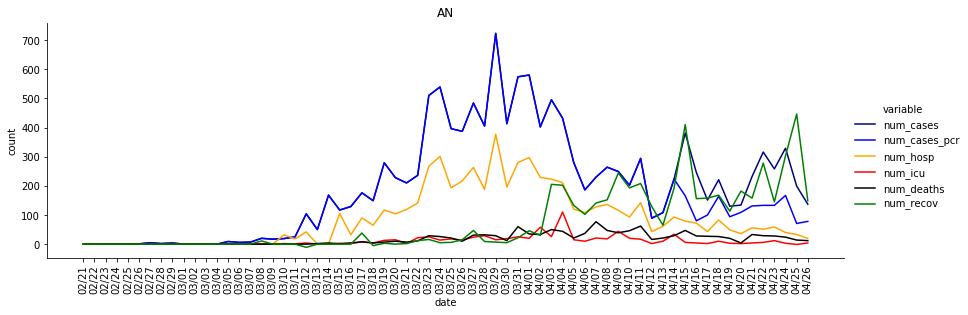

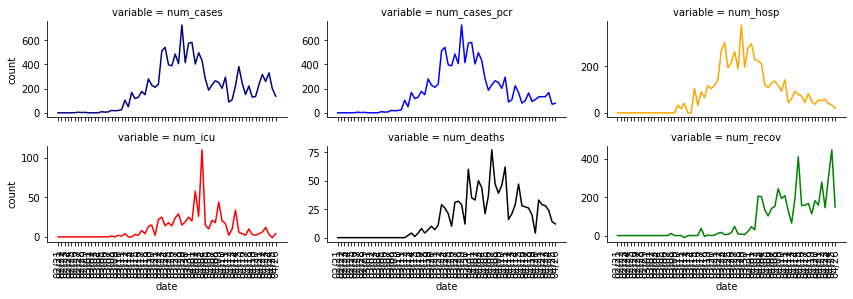

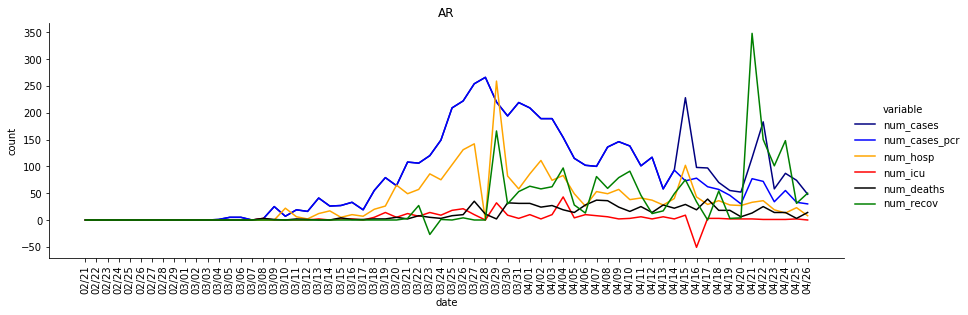

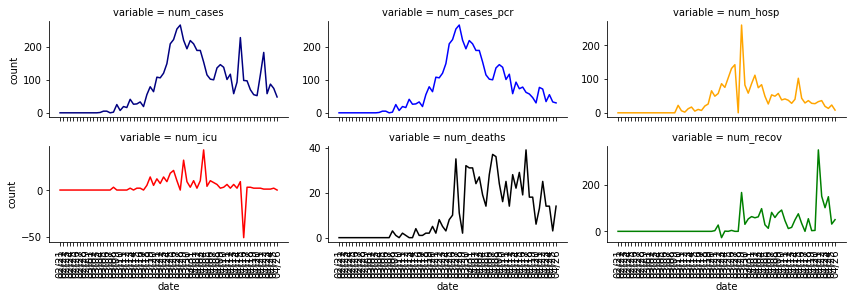

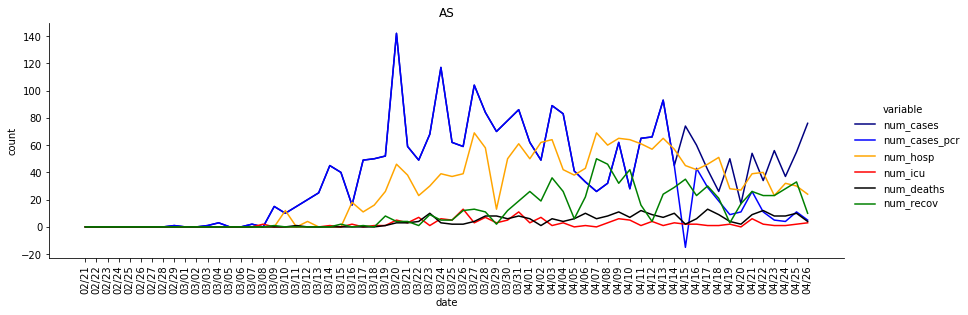

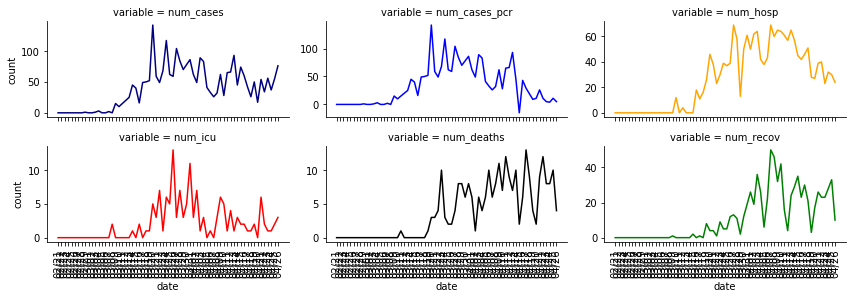

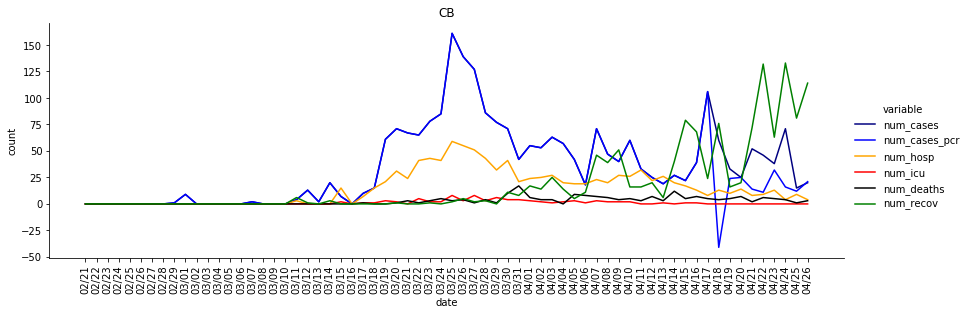

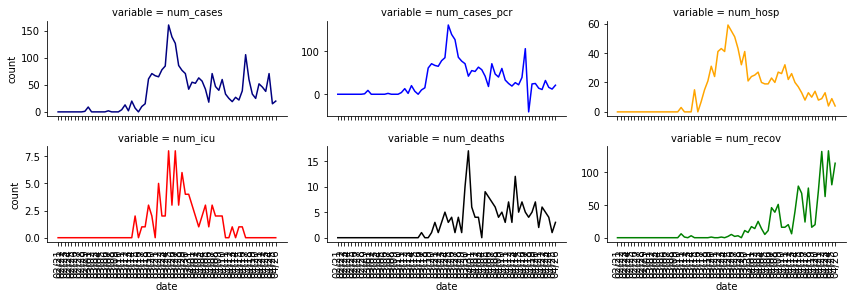

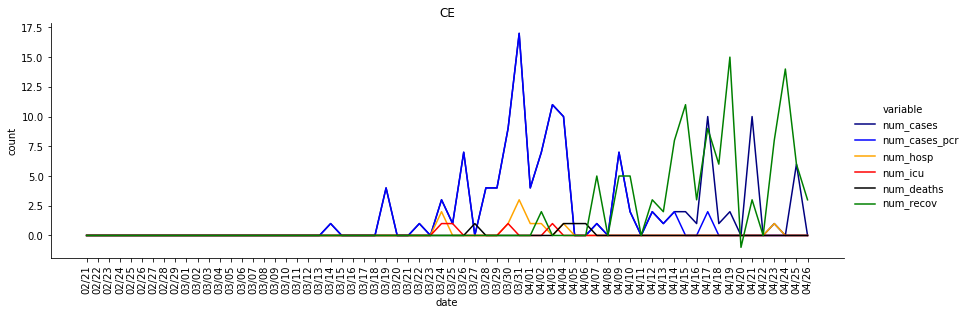

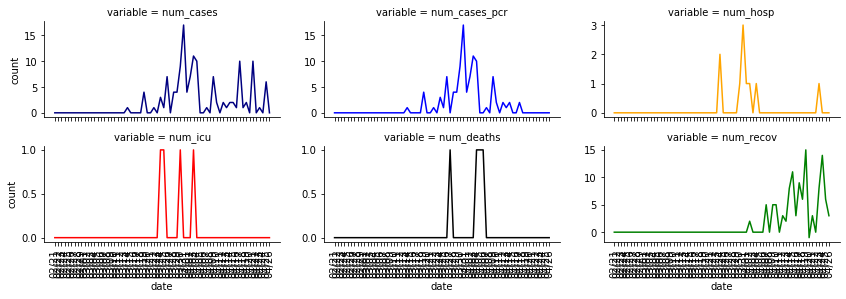

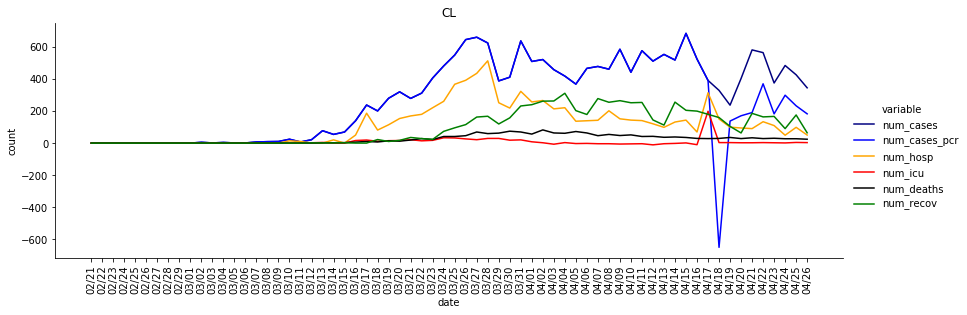

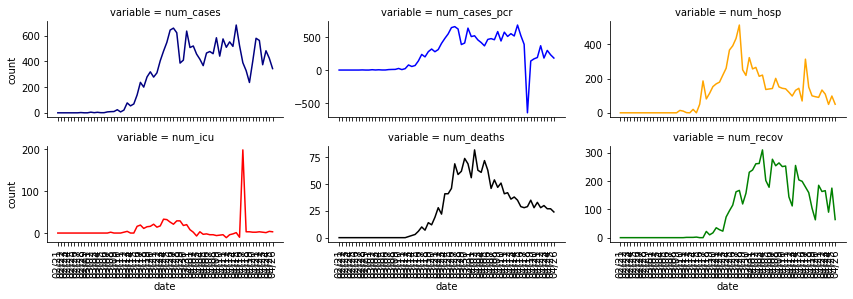

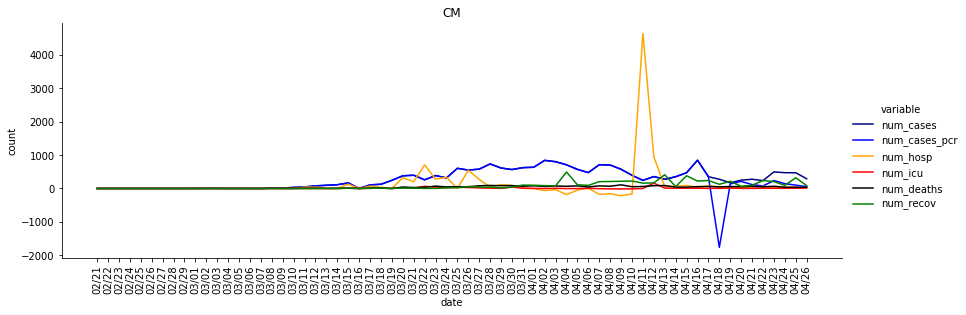

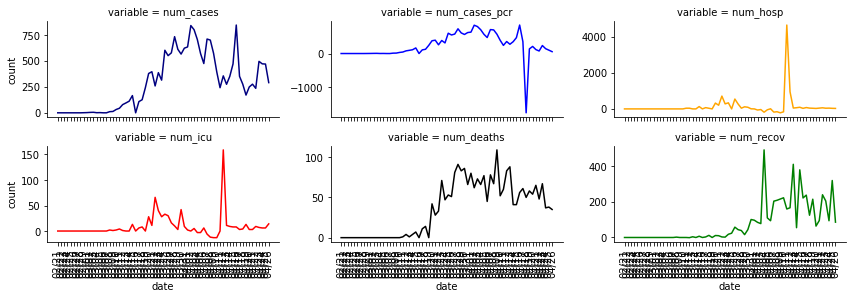

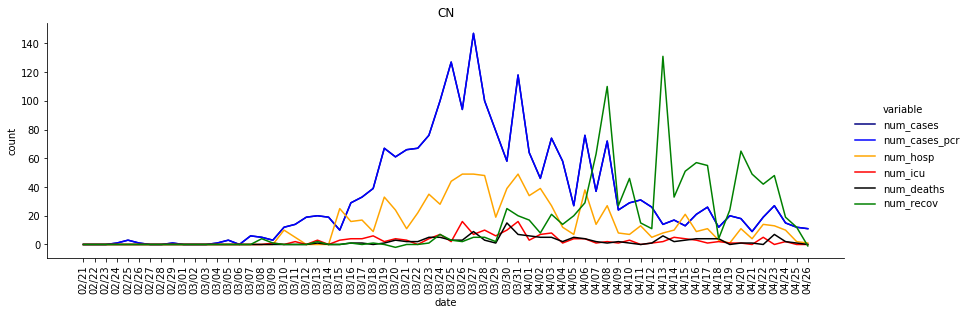

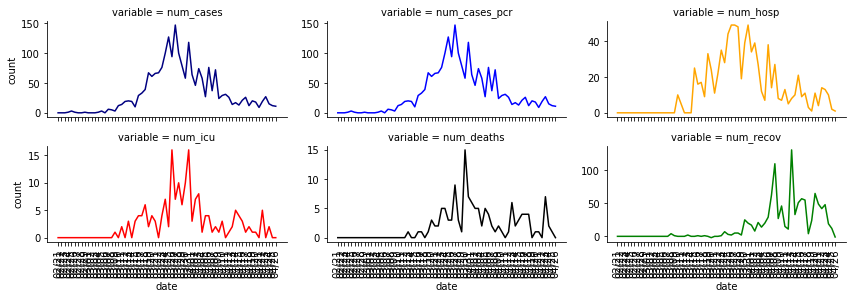

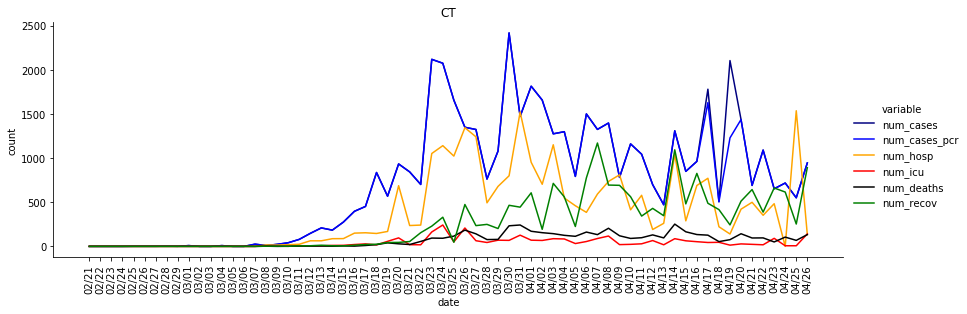

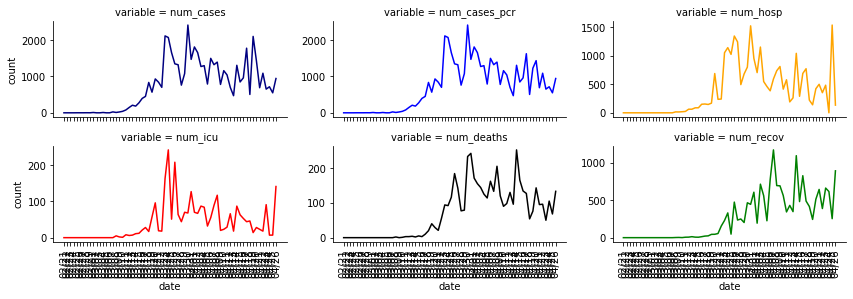

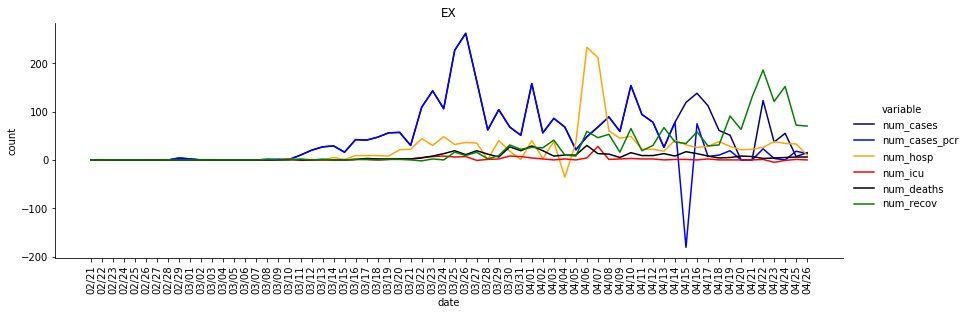

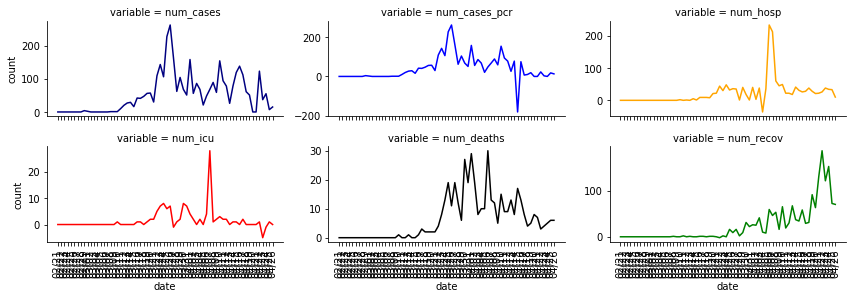

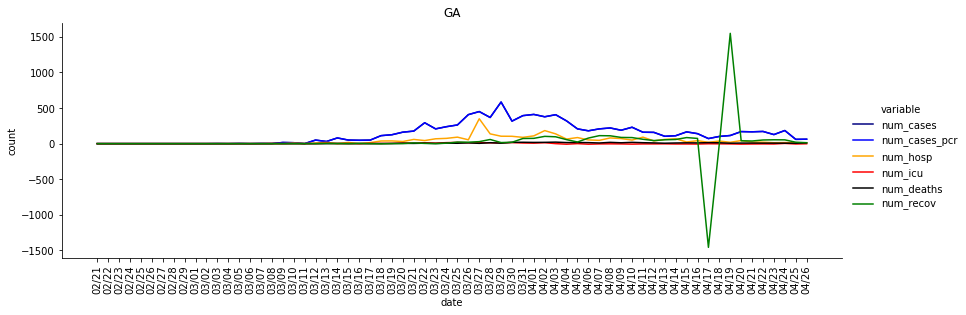

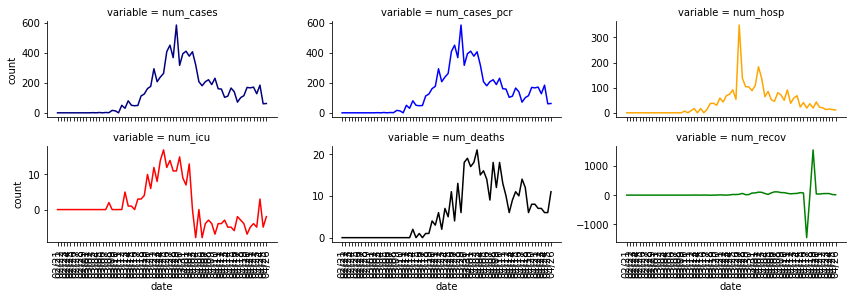

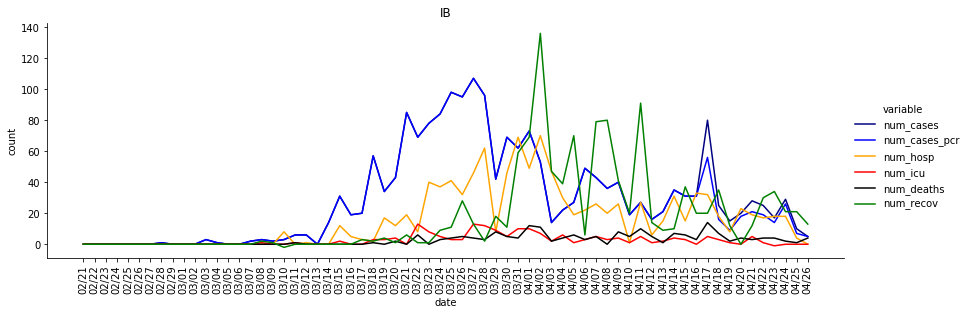

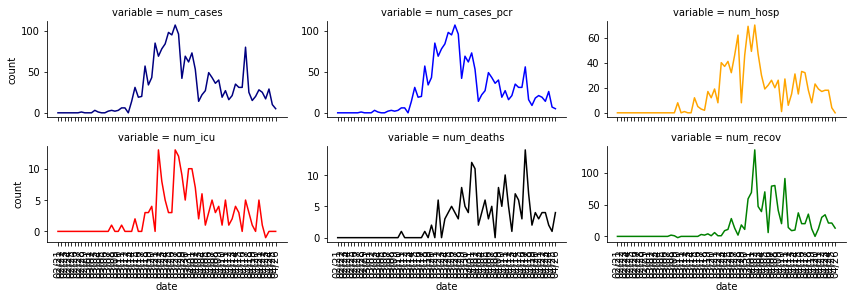

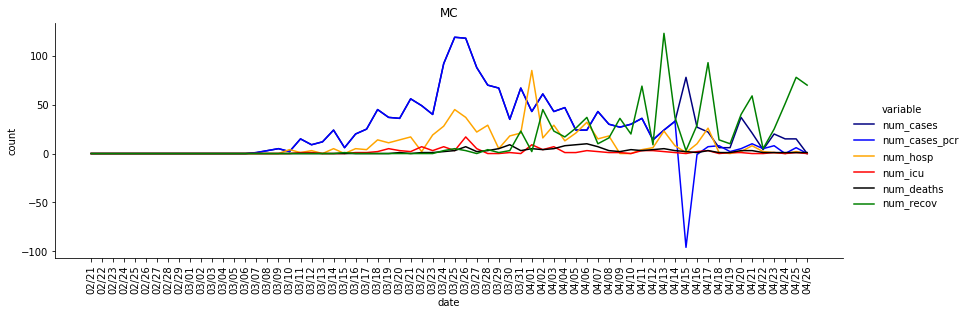

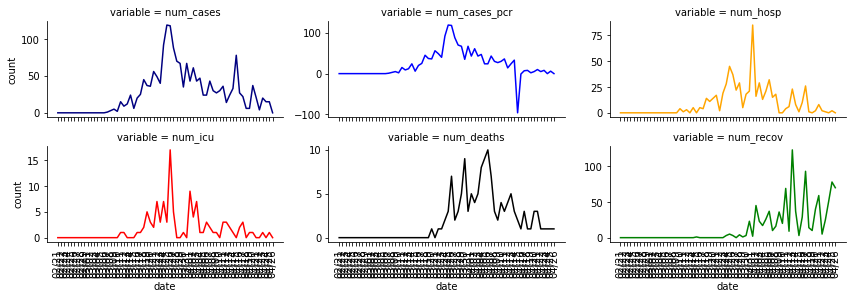

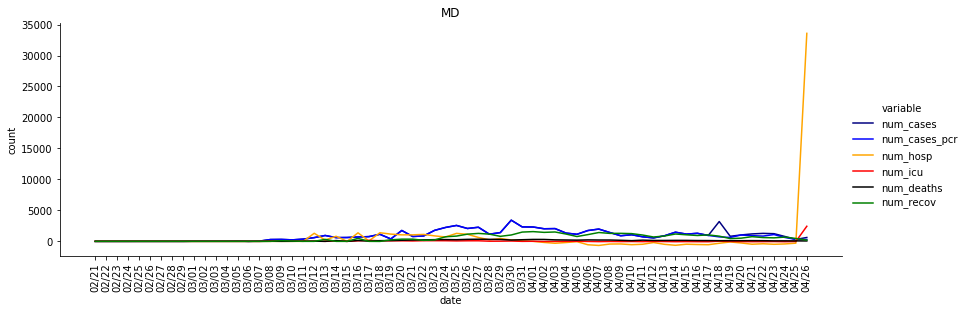

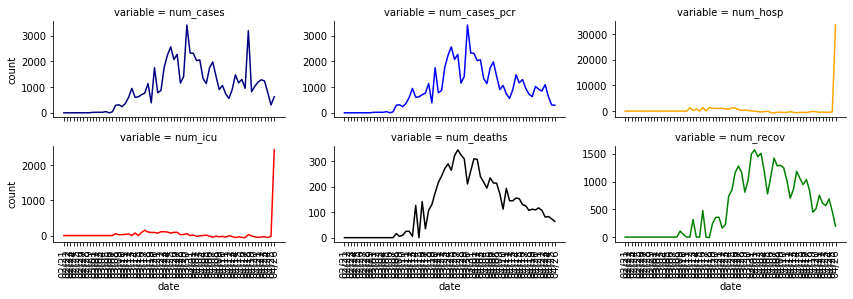

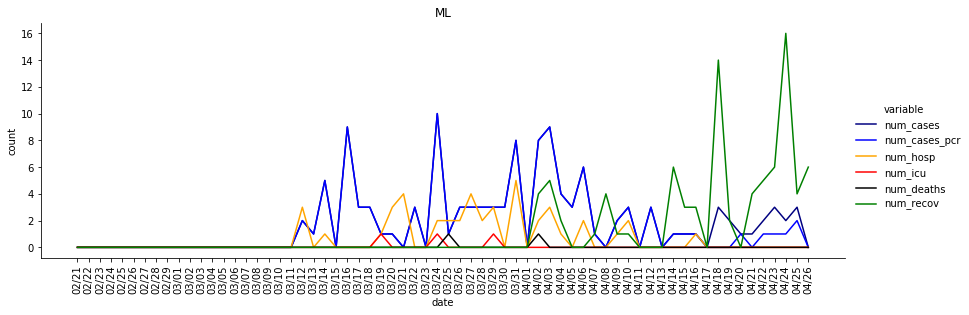

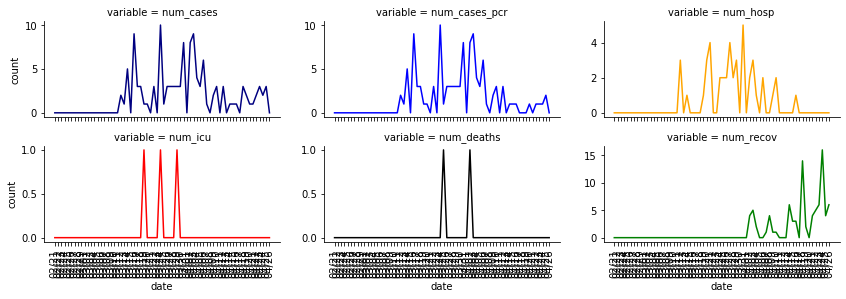

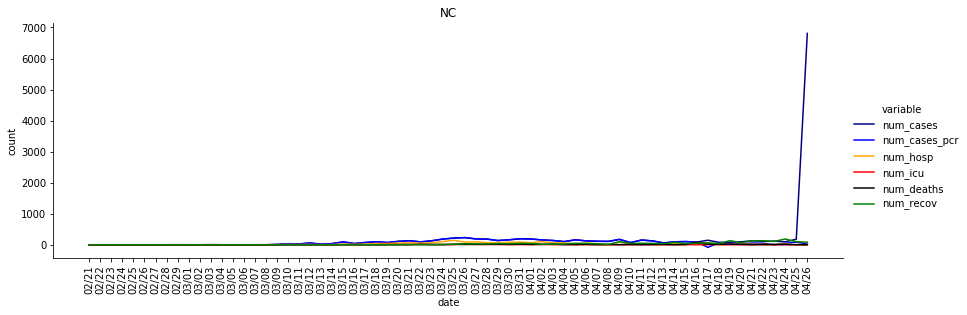

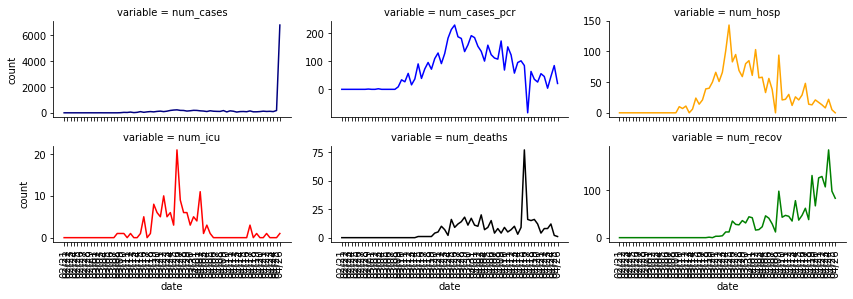

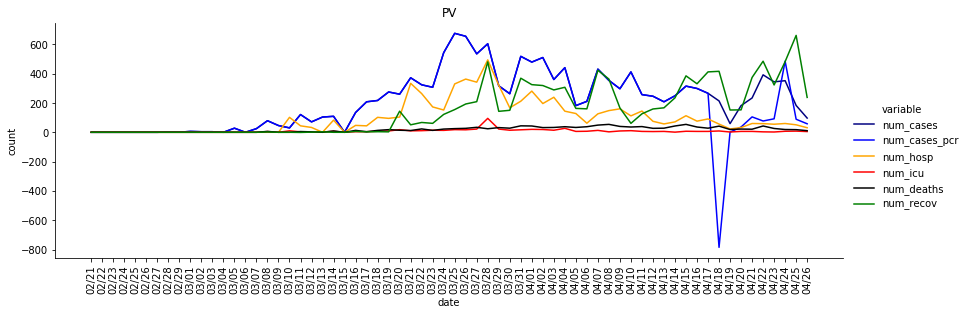

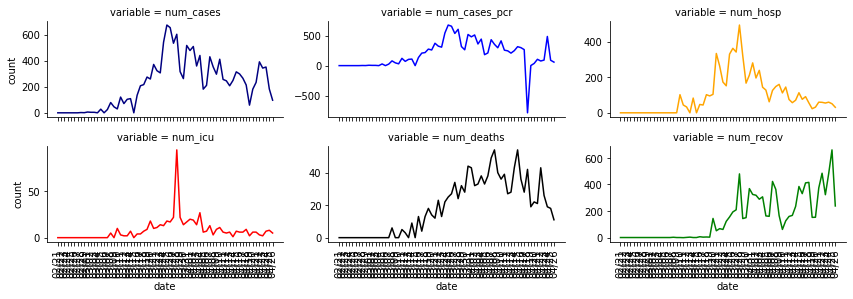

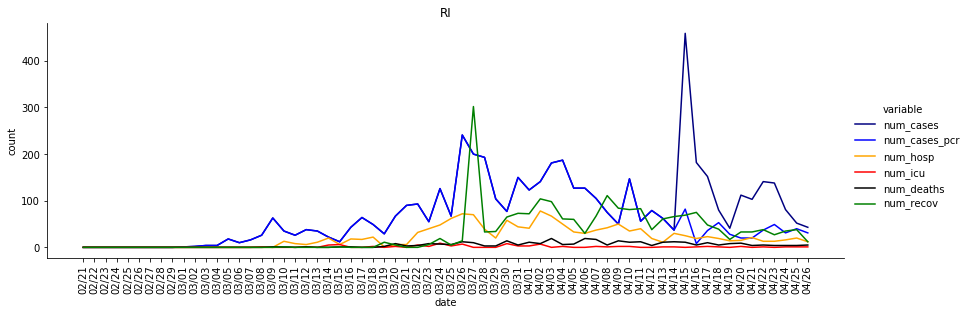

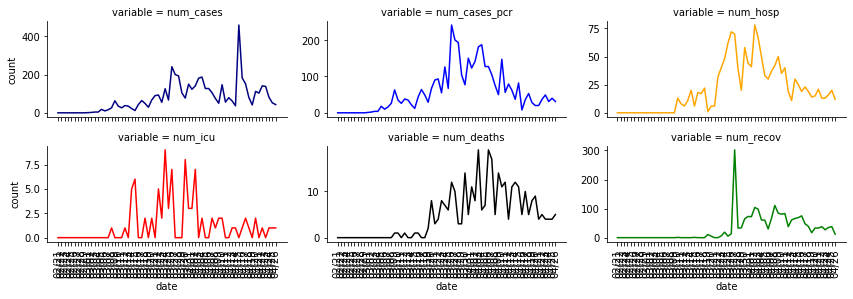

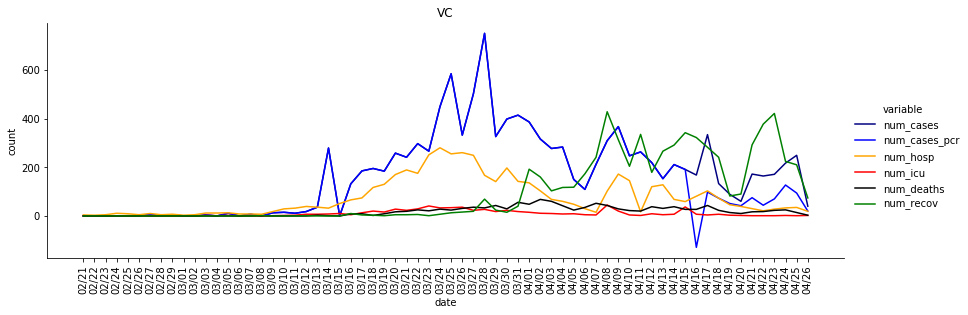

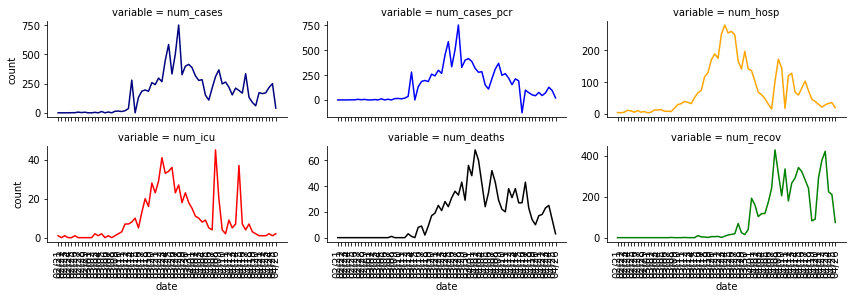

In [12]:
for region in list_regions:
    df_covid19_inc_region = df_covid19_inc[df_covid19_inc['region'] == region].drop('region', axis = 1)
    df_covid19_inc_region['date'] = df_covid19_inc_region['date'].apply(lambda x: x.strftime('%m/%d'))
    df = df_covid19_inc_region.melt('date', var_name='variable', value_name='count')
    g = sns.relplot(x = 'date', y = 'count', hue= 'variable',
                    height= 4, aspect= 6 / 2,
                    facet_kws = dict(sharex = False), palette = pal,
                    kind = 'line', legend= 'full', data = df)
    plt.title(region)
    g.set_xticklabels(rotation = 90) 
    
    g = sns.FacetGrid(df, col = 'variable', hue = 'variable', 
                      height= 2, aspect= 4 / 2, col_wrap = 3, 
                      sharey = False, palette = pal)
    g.map(plt.plot, 'date', 'count')
    g.set_xticklabels(rotation = 90) 